# 11. QLS - Random Variables

## Discrete and Continuous Random Variables

A **random** variable is one which takes on values according to chance. When discussing them, we describe them in terms of probability distributions. That is, the probability that each value can come out of the random variable. The classic example is a die, which can produce the values 1-6 with uniform probability.

We typically separate random variables into two different classes:

- Discrete random variables
- Continuous random Variables

How each is handled varies, but the principles behind them remain the same. Financial assets are often expressed as moving according to deterministic and random patterns, with the random patterns being expressed with random variables. To do this we 'sample' from the random variable at each timestep,then move the instrument by that amount. This is used because much of the movements in assets is unexplained using deterministic models.

Each random variable follows a **probability distribution**, a function which describes it. It assigns probabilities to all possible values of a random variable. For a random variable $X$, we express the probability that $X$ is equal to a value $x$ as $P(X=x)$. For discrete random variables, we can express $p(x) = P(X=x)$ in shorthand. This is also known as the **probability mass function** (PMF). For continuous random variables we use a **probability density function** (PDF). These form the basis for the 'Black-Scholes' and binomial pricing models as well as the CAPM. An understanding of them is also needed to perform MonteCarlo simulations.

For each probability distribution function, we have a **cumulative distribution function** (CDF). This is defined as $P(X \leq x)$, the probability that the random variable is less than or equal to a particular value. The shorthand for the CDF is $F(x) = P(X \leq x)$. In order to find $F(x)$ in the discrete case, we sum up the values of PMF for all outcomes less than or equal to $x$. In the continuous case, we integrate the PDF over all values up to $x$.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from statsmodels.stats import stattools
import yfinance as yf

### Discrete Random Variables

It's one with a countable number of outcomes. Each of these outcomes has a separate probability associated with it. Consider a coin flip or a die roll, some of the most basic uniformly distributed random variables. For the coin flip, there are two possible outcomes, either heads or tails, each with a $\frac{1}{2}$ probability of occurring.

Discrete random variables don't always have equal weight for all the outcomes. The basic unit of a discrete random variable is it's PMF. The PMF gives a probability (a mass) to each point in the domain of the probability distribution.

A probability function has two main properties:

1. $0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0,1]$
2. The sum of all properties $p(x)$ over all values of $X$ is equal to $1$. The total weights for all values of the random variable must add to $1$.

Here we will consider some examples of the most prevalent discrete probability distributions.

In [2]:
class DiscreteRandomVariable:
    def __init__(self, c=0, d=1):
        self.variableType = ""
        self.low = c
        self.high = d
        return
    def draw(self, numberofsamples):
        samples = np.random.randint(self.low, self.high, numberofsamples)
        return samples

#### Uniform Distribution

This is the most basic type of probability distribution. It assigns equal weight to all the outcomes. Take the example of rolling a die. It has six faces, numbered 1 through 6,each equally likely to occur with a $\frac{1}{6}$ chance each. So, we know the PMF must be $p(x) = \frac{1}{6}$ for all values of our uniform random variable $X$.

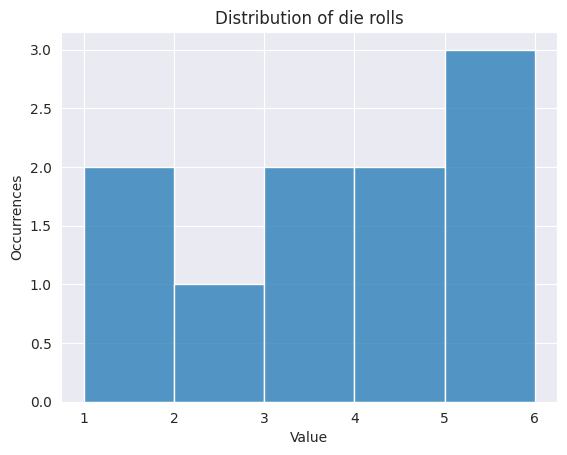

In [3]:
DieRolls = DiscreteRandomVariable(1, 6)
sb.histplot(DieRolls.draw(10), bins=[1,2,3,4,5,6]).set(title="Distribution of die rolls", xlabel="Value", ylabel="Occurrences");

Each time we roll the die, we have an equal chance of getting each face. In the short run it'll look uneven, but the larger the sample (law of large numbers) the closer we get to $\frac{1}{6}$.

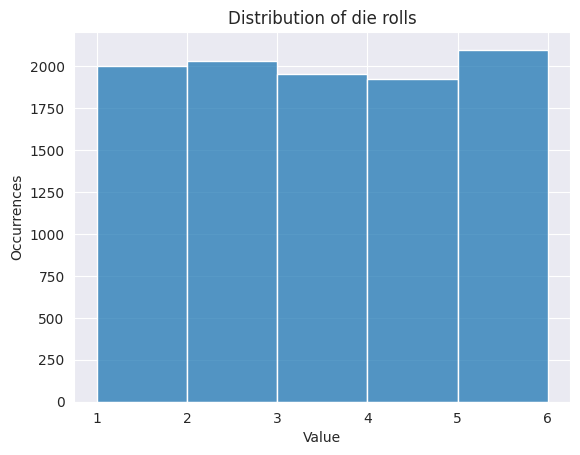

In [4]:
sb.histplot(DieRolls.draw(10000), bins=[1,2,3,4,5,6]).set(title="Distribution of die rolls", xlabel="Value", ylabel="Occurrences");

So with a die roll, we can see $p(x) = \frac{1}{6}$ for all values of $X$. Let's look at the possibility for all values of the probability functions and the cumulative distribution function:

| **Value**: $X=x$ | **PMF**: $P(X=x)$ | **CDF**: $F(x) = P(X \leq x)$ |
|:----------------:|:-----------------:|:-----------------------------:|
|        1         |        1/6        |              1/6              |
|        2         |        1/6        |              1/3              |
|        3         |        1/6        |              1/2              |
|        4         |        1/6        |              2/3              |
|        5         |        1/6        |              5/6              |
|        6         |        1/6        |               1               |


Using this table we can easily see that the probability function satisfies the conditions. Each value of the probability function is in the interval $[0,1]$, satisfying the first condition. All values of $p(x)$ sum to $1$, satisfying the second condition.

This demonstrates two properties of the cumulative distribution function:

1. The CDF is between $0$ and $1$ for all $x$. This parallels the value of the PDF.
2. The CDF is nondecreasing in $x$. This means that as $x$ increases, the CDF either increases or remains constant.

When attempting to sample other probability distributions, we can use compositions of the uniform distribution with certain functions in order to get the appropriate samples. But, this is very inefficient. So, we can use `numpy` functions for each distribution to simplify everything.

#### Binomial Distribution

It's used to describe successes and failures. This can be useful in an investment context since many of our choices are binary. When we take a single success/failure trial, we call it a 'Bernoulli' trial. With the Bernoulli random variable, we have two possible outcomes:

$$p(1) = P(Y=1) = p$, or $p(0) = P(Y=0) = 1-p$$

We consider $Y$ taking on a value of $1$ to be a success, so the probability of a success occurring in a single trial is $p$.

A binomial distribution takes a set of $n$ Bernoulli. So, we can have somewhere between $0$ and $n$ successes. Each trial has the same probability of success $p$, and all the trials are independent of each other. We can describe the entire binomial random variable using only $n$ and $p$, signified by the notation $X \sim B(n,p)$. This states that $X$ is a binomial random variable with parameters $n$ and $p$.

In order to define the probability function of a binomial we must choose some number of successes out of the total number of trials. This tends to the combination idea in combinatorics. A combination describes all possible ways of selecting items out of a collection so order doesn't matter. E.g. if we have 6 pairs of socks, and we want to choose 2 of them, we would write the total number of combinations possible as $\binom{6}{2}$. This is expanded as:

$$\binom{6}{2} = \frac{6!}{4!2!} = 15$$

Where $!$ denotes factorial, and $n! = (n)(n-1)(n-2)\ldots (1)$. In order to write the formula for a combination, generally we write:

$$\binom{n}{x} = \frac{n!}{(n-x)!x!}$$

We use this notation in order to choose successes with our binomial random variable. The combination serves the purpose of computing how many different ways there are to reach the same result. The resulting probability function is:

$$p(x) = P(X=x) = \binom{n}{x} p^{x}(1-p)^{n-x} = \frac{n!}{(n-x)!x!} p^{x}(1-p)^{n-x}$$

In [5]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberoftrials=10, probabilityofsuccess=0.5):
        super().__init__()
        self.variableType = "Binomial"
        self.numberOfTrials = numberoftrials
        self.probabilityOfSuccess = probabilityofsuccess
        return
    def draw(self, numberofsamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberofsamples)
        return samples

E.g. take a stock moving up/down, each with probability $p=0.5$. We can consider a move up, or $U$, to be a success; a move down, or $D$, to be a failure. With this, we can analyze the probability of each event by using a binomial random variable. We also consider an $n$-value of $5$ for five observations of the stock price over time. The following table shows the probability of each event:

| **$x$ number of $U$ moves** | **$x$ ways of $U$ moves $\binom{n}{x}$** | **Independent trials with $p=0.5$** | **$p(x)$ value** | **CDF: $F(x) = P(X \leq x)$** |
|:---------------------------:|:----------------------------------------:|:-----------------------------------:|:----------------:|:-----------------------------:|
|              0              |                    1                     |  $0.05^{0}(1-0.50)^{5} = 0.03125$   |     0.03125      |            0.03125            |
|              1              |                    5                     |  $0.05^{1}(1-0.50)^{4} = 0.03125$   |     0.15635      |            0.18750            |
|              2              |                    10                    |  $0.05^{2}(1-0.50)^{3} = 0.03125$   |     0.31250      |            0.50000            |
|              3              |                    10                    |  $0.05^{3}(1-0.50)^{2} = 0.03125$   |     0.31250      |            0.81250            |
|              4              |                    5                     |  $0.05^{4}(1-0.50)^{1} = 0.03125$   |     0.15635      |            0.96875            |
|              5              |                    1                     |  $0.05^{5}(1-0.50)^{0} = 0.03125$   |     0.03125      |            1.00000            |

We see that when $p=0.50$, the binomial distribution is symmetric. Because we have an equal probability for an upward/downward move, the only differentiating factor being the combination aspect of the probability function, which is symmetric. If we are to slightly modify the value of $P$ we would end up with an asymmetric distribution.

Now we will draw some samples for the parameters above, where $X \sim B(5, 0.50)$:

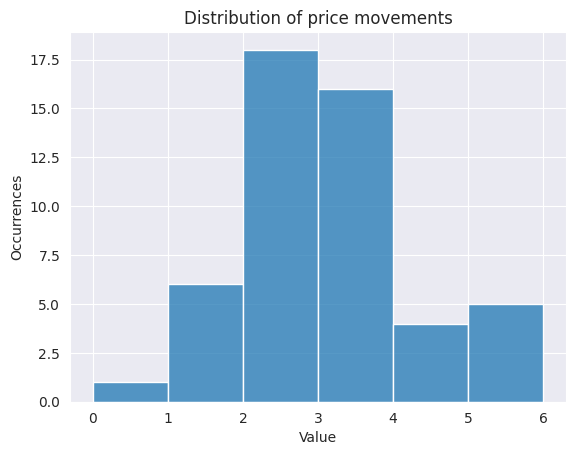

In [6]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
sb.histplot(StockProbabilities.draw(50), bins=[0,1,2,3,4,5,6]).set(title="Distribution of price movements", xlabel="Value", ylabel="Occurrences");

The more samples we take, the more consistent the distribution looks:

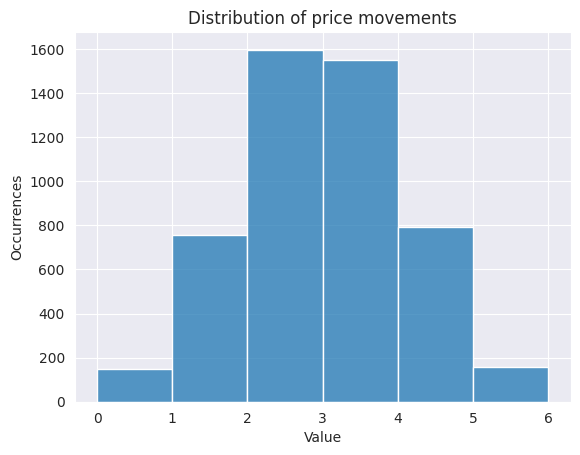

In [7]:
sb.histplot(StockProbabilities.draw(5000), bins=[0,1,2,3,4,5,6]).set(title="Distribution of price movements", xlabel="Value", ylabel="Occurrences");

Say we change $p=0.50$. This makes it so that $P(X=0) = 0.23730$, skewing the distribution towards lower values. We can see this in the following histogram:

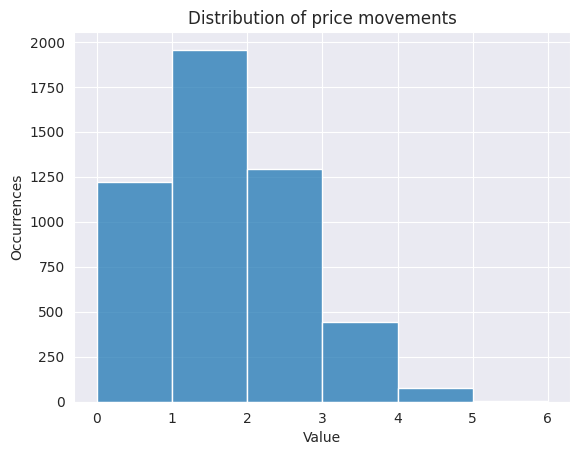

In [8]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
sb.histplot(StockProbabilities.draw(5000), bins=[0,1,2,3,4,5,6]).set(title="Distribution of price movements", xlabel="Value", ylabel="Occurrences");

Changing the value of $p$ from $0.50$ to $0.25$ clearly makes the distribution asymmetric. We can extend this idea of a stock price moving with a binomial rando variable into a framework called 'Binomial Model of Stock Price Movement'. This is used as one of the foundations for option pricing. This model assumes that for any given time period, a stock can move up/down by a value determined by the up/down probabilities. This turns the stock price into the function of a binomial random variable, the magnitude of upward or downward movement, and the initial stock price. We can vary these parameters to approximate different stock price distributions.

### Continuous Random Variables

These differ from discrete random variables, in that continuous ones can take infinitely many outcomes. They can't be counted or described as a list. It means nothing if we assign individual probabilities to outcomes, because there are infinite outcomes, the probability of hitting any outcome is $0$.

We can solve this by taking probabilities across ranges of outcomes. We look for something like $P(-1 < X < 1)$. For continuous random variables, rather than using a PMF, we define a **probability density function** (PDF), $fx(x)$, such that we can say:

$$P(a < X < b) = \int_{b}^{a} fx^{(x)}dx$$

Similar to our requirement for discrete distributions that all probabilities add to $1$, here we require that:

1. $fx(x) \geq 0$ for all values of $X$.
2. $P(- \infty < X < \infty = \int_{\infty}^{- \infty} fx^{(x)}dx = 1$.

It is worth noting that because the probability at an individual point with a continuous distribution is $0$, the probabilities at the endpoints of a range are $0$. Hence, $P(a \leq X \leq b) = P(a < X \leq b) = P(a \leq X < B) = P(a < X < b)$. If we integrate the PDF across all possibilities, over the total possible range, the value should be $1$.

In [9]:
class ContinuousRandomVariable:
    def __init__(self, c=0, d=1):
        self.variableType = ""
        self.low = c
        self.high = d
        return
    def draw(self, numberofsamples):
        samples = np.random.uniform(self.low, self.high, numberofsamples)
        return samples

#### Uniform Distribution

This can be defined within the framework of a continuous random variable. We take $a$ and $b$ to be constant, where $b$ is the highest possible value, and $b$ is the lowest possible value that the outcome gets. So the PDF of a uniform random variable is:

$$f(x) = \begin{cases} \frac{1}{b-a} & \text{for $a < x < b$} \ 0 & \text{otherwise} \end{cases}$$

Since this function is defined on a *continuous interval*, the PDF covers all values between $a$ and $b$. Here we have a plot of the PDF:

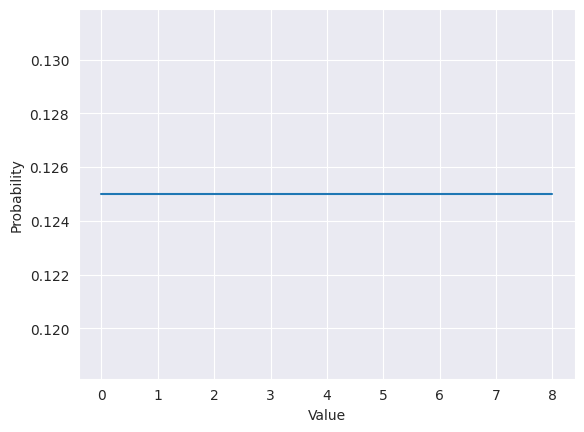

In [10]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
sb.lineplot(x=x, y=y).set(xlabel="Value", ylabel="Probability");

As before in the discrete uniform case, the continuous uniform distribution's PDF is constant for all values the variable can take on. Only difference being that we can't take the probability for a specific point. The CDF, which we get from integrating the PDF, is:

$$F(x) = \begin{cases} 0 \; \text{for $x \leq a$} \ \frac{x-a}{b-a} & \; \text{for $a < x < b$} \ 1 & \text{for $x \geq b$} \end{cases}$$

And it's plotted on the same interval of the PDF as:

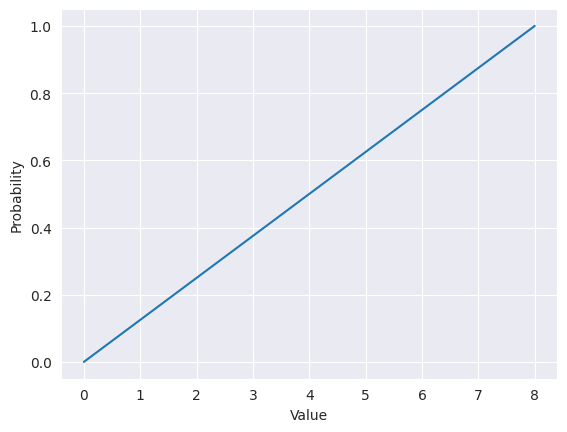

In [11]:
y = [(i-a)/(b-a) for i in x]
sb.lineplot(x=x, y=y).set(xlabel="Value", ylabel="Probability");

#### Normal Distribution

It's a very common and important distribution in statistics. Many tests and methods in statistics, and finance, are based on the assumption of normality. A large part of this is due to the results of the **Central Limit Theorem** (CLT),which states that large enough samples of independent trials are normally distributed. This convenience finds its way into certain trading models. E.g. pairs trading with cointegrated pairs assumes the spread will change on a normal distribution.

In [12]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberofsamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberofsamples)
        return samples

When describing a normal random variable, we only need to know its mean ($\mu$) and variance ($\sigma^{2}$, where $\sigma$ is the standard deviation). We denote a random variable $X$ as normal by stating $X \sim N(\mu , \sigma^{2})$. In modern portfolio theory, stock returns are generally assumed to follow a normal distribution. One major characteristic of a normal random variable is that a linear combination of two or more of these, is another random variable. This is useful for considering mean returns and variance of a portfolio of multiple stocks. Until here, we've only considered uni-variate probability distributions. When we want to describe random variables at once (i.e. observing multiple stocks), we can look at a multivariate distribution. A multivariate normal distribution is described entirely by the means of each variable, their variances, and the correlations. This is important when portfolio building because the portfolio variance depends on the variance of the securities, and the correlations between them.

The PDF of a normal random variable is:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x- \mu)^{2}}{2 \sigma^{2}}}$$

And is defined for $- \infty < x < \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the standard normal distribution.

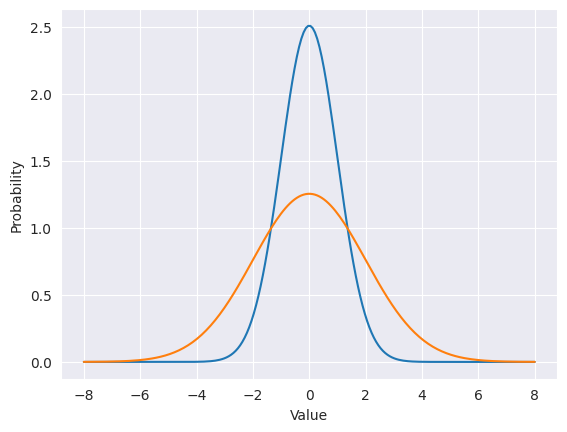

In [13]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/sigma_1 * np.sqrt(2 * 3.14159)) * np.exp(-(x - mu_1) * (x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/sigma_2 * np.sqrt(2 * 3.14159)) * np.exp(-(x - mu_2) * (x - mu_2) / (2 * sigma_2 * sigma_2))
sb.lineplot(x=x, y=y)
sb.lineplot(x=x, y=z).set(xlabel="Value", ylabel="Probability");

By changing the mean and standard deviation of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.

Rather than using normal distribution to model stock prices, we use it to model returns. Prices can't go below $0$, the normal distribution can take on all values in a real line, making it better for returns. Given the mean and variance of a normal distribution, we can make the following statements:

- Around 68% of all observations fall within one standard deviation around the mean ($\mu \pm \sigma$).
- Around 95% of all observations fall within two standard deviations around the mean ($\mu \pm 2 \sigma$).
- Around 99% of all observations fall within three standard deviations around the mean ($\mu \pm 3 \sigma$).

These values are important for understanding confidence intervals as they relate to the normal distribution. When considering the mean and variance of a sample distribution, we look at different confidence intervals around the mean.

Using the CLT, we can standardize random variables so that they become normal random variables. A very common tool in statistics is a standard normal probability table, used for looking up the values of the standard normal CDF for values of $x$. By changing random variables into standard normal, we can check these tables for probability values. We standardize a random variable $X$ by subtracting the mean and dividing by the variance, resulting in the standard normal random variable $Z$.

$$Z = \frac{X - \mu}{\sigma}$$

Let's look at the case where $X \sim B(n,p)$ is a binomial random variable. In this case, the mean is $\mu = np$ and the variance is $\sigma^{2} = np(1-p)$.

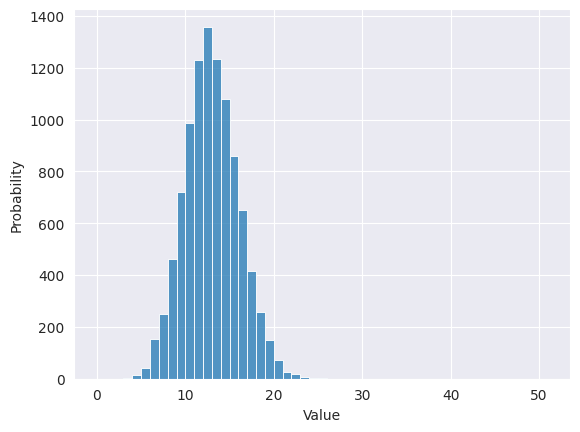

In [14]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))
sb.histplot(X_samples, bins=range(0, n+2)).set(xlabel="Value", ylabel="Probability");

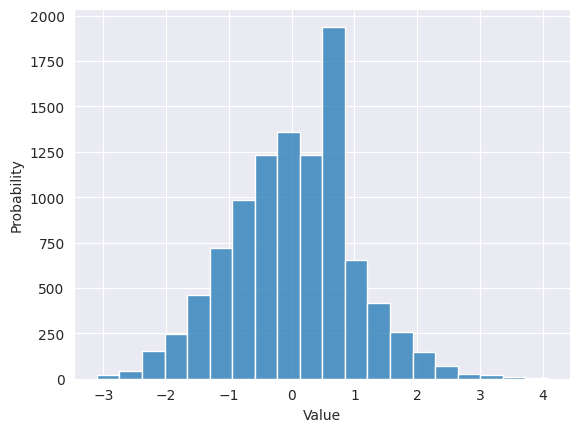

In [15]:
sb.histplot(Z_samples, bins=20).set(xlabel="Value", ylabel="Probability");

By changing a random variable to a distribution that we are more familiar with, the standard normal distribution, we can answer any probability questions about the original variable. This is dependent on having a large sample size.

Let's assume that stock returns are normally distributed. Say that $Y$ is the price of a stock. We will simulate its returns and plot it.

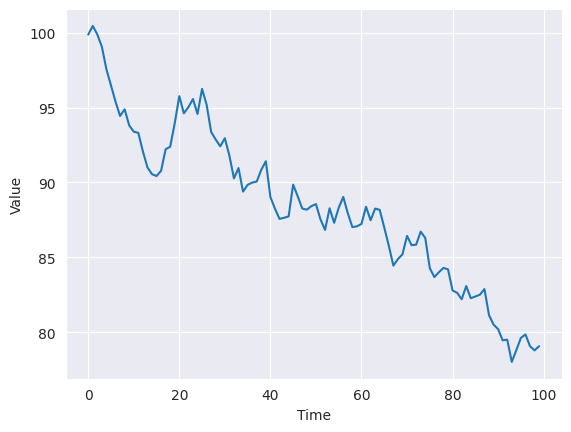

In [16]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = "Y") + Y_initial
sb.lineplot(Y).set(xlabel="Time", ylabel="Value");

Say we have some other stock, $Z$, and that we have a portfolio of $Y$ and $Z$, being $Z$.

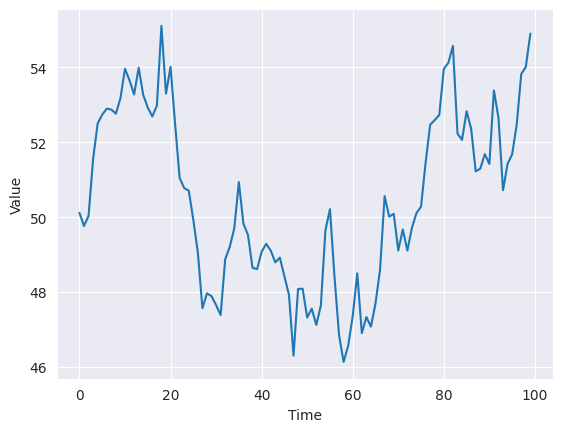

In [17]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = "Z") + Z_initial
sb.lineplot(Z).set(xlabel="Time", ylabel="Value");

We construct $W$ by taking a weighted average of $Y$ and $Z$ based on their quantity.

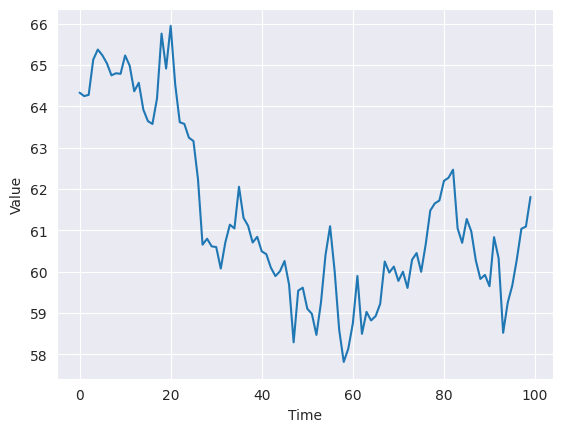

In [18]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity+Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = "Portfolio") + W_initial
sb.lineplot(W).set(xlabel="Time", ylabel="Value");

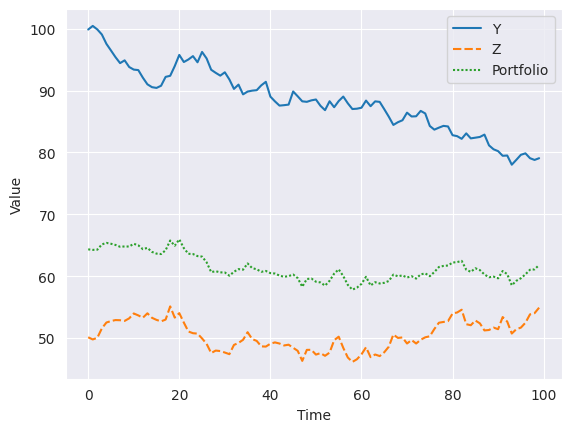

In [19]:
sb.lineplot(pd.concat([Y, Z, W], axis = 1)).set(xlabel="Time", ylabel="Value");

Note how the returns of our portfolio, $W$, are normally distributed.

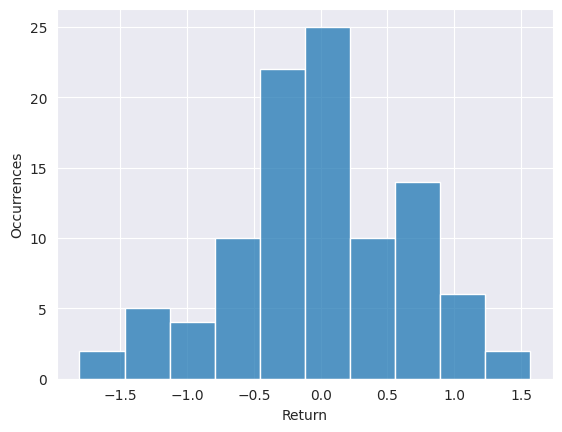

In [20]:
sb.histplot(W_returns).set(xlabel="Return", ylabel="Occurrences");

The normal distribution is widely used in finance, especially in risk and portfolio theory. It's used from risk analysis to price modelling.

### Fitting a Distribution

Now we will attempt to fit a probability distribution to the returns of a stock. We will take the returns of TSLA and try to fit a normal distribution to them. The first thing is to check whether the returns actually exhibit normal distribution properties. We can use the Jarque-Bera test to indicate non-normality if the p-value is below a cutoff.

[*********************100%***********************]  1 of 1 completed
The JB test p-value is: 6.86088191296977e-55
We reject the hypothesis that the data are normally distributed? True
The skewness of the returns is: 0.7513123088069725
The kurtosis of the returns is: 7.646746902938263


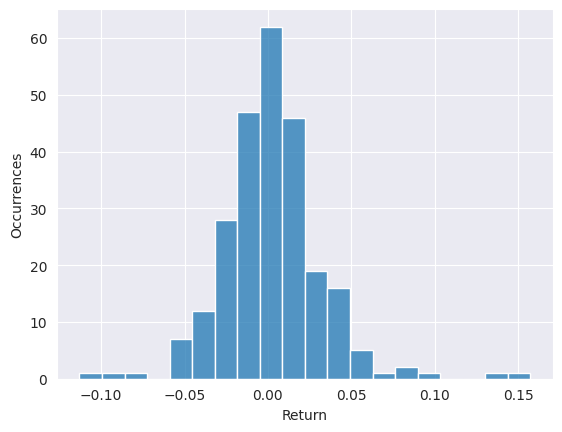

In [21]:
start = "2014-01-01"
end = "2015-01-01"
prices = yf.download("TSLA", start, end)

# Take the daily returns
returns = prices["Adj Close"].pct_change()[1:]

sb.histplot(returns, bins=20).set(xlabel="Return", ylabel="Occurrences")

# Set a cutoff
cutoff = 0.01

# get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)

print("The JB test p-value is:", p_value)
print("We reject the hypothesis that the data are normally distributed?", p_value < cutoff)
print("The skewness of the returns is:", skewness)
print("The kurtosis of the returns is:", kurtosis)

The low p-value of the JB test leads us to *reject* the null hypothesis that the returns are normally distributed. This is due to the high kurtosis (normal distributions have a kurtosis of $3$).

We'll proceed assuming the returns are normally distributed, so we can go through the steps of fitting a distribution. Next we calculate the sample mean and standard deviation of the series.

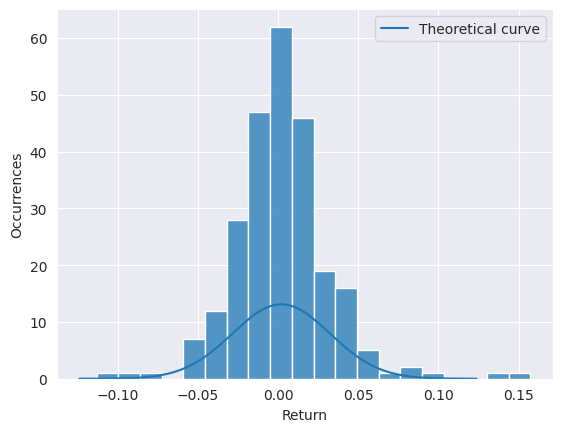

In [22]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

# let's see how a theoretical normal curve fits against the actual values
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))

sb.histplot(returns, bins=20)
sb.lineplot(x=x, y=sample_distribution, label="Theoretical curve").set(xlabel="Return", ylabel="Occurrences");

Our theoretical curve for the returns has a lower peak than the actual value, which makes sense because the returns aren't normally distributed. The returns have a kurtosis of $5.21$, while the kurtosis of the normal distribution is $3$. The higher the kurtosis the higher the peak.

A **major** reason why modelling prices and returns is so hard is due to the underlying probability distributions. A lot of theories and frameworks in finance require data to be related to the normal distribution. This is why normal distribution seems to be so prevalent. E.g. the basis of the Black-Scholes pricing model for options assumes stock prices are log-normally distributed. However, it's hard to find real data that fits nicely into the assumptions of normality.

When implementing a strategy, we shouldn't assume data follows a distribution UNLESS there is a very good reason for it.

Generally, when trying to fit a probability distribution to real values, we need to have a particular distribution(s) in mind. There are a variety of tests we can apply to find the best fit. As more information becomes available, we will need to update the sample mean and standard deviation. or find new distributions that better fit the model.